# 

In [195]:
# 모듈 로딩
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from tensorflow.keras import Sequential
from sklearn.utils import all_estimators
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from urllib.request import urlopen,Request,urlretrieve
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [44]:
# 크롤링 데이터 로테이션시키는 함수
def rota_save(color,foldname):
    # 폴더 만들기
    if not os.path.exists('./'+foldname):
        os.makedirs(foldname)
    
    rotation=[45,90,135,180,225,270,315]
    for file in os.listdir('./data/'):
        for rot in rotation:
            img=np.array(Image.open('./data/'+file).convert(color))
            rows,cols = img.shape[0:2]
            ro_mt = cv2.getRotationMatrix2D((cols/2,rows/2),rot,1.42)
            ro_img = cv2.warpAffine(img, ro_mt,(cols, rows))
            
            # 이미지 저장
            filename=f"{file}_ro{str(rot)}"
            cv2.imwrite('./'+foldname+'/'+filename+'.png',ro_img)

In [45]:
# 크롤링 데이터 convert 함수
def data_con(color,foldname):
    for file in os.listdir('./data/'):
        img=Image.open('./data/'+file).convert(color).save('./'+foldname+'/'+file)

In [46]:
# 흑백으로 로테이션
rota_save('L','blwh')

# rgb로 로테이션
rota_save('RGB','rgb')

In [47]:
# 원본사진 흑백으로
data_con('L','blwh')

# 원본사진 색깔로
data_con('RGB','rgb')

In [124]:
def solution(foldname):
    l=[]
    for i in os.listdir('./'+foldname+'/'):
        n=np.array(Image.open('./'+foldname+'/'+i))/255.0
        if foldname=='blwh':
           n_list=n.reshape(-1,50,50)[0].tolist()
        else:
            n_list=n.reshape(-1,50,50,3)[0].tolist()
        l.append(n_list)
    return np.array(l)

In [125]:
# 동적 웹 크롤링으로 사진저장 함수
def image_save(urlpath,charname):
    driver = webdriver.Chrome('chromedriver.exe') # C:/Users/User/EXAM_PANDAS/DAY-0630/DAY-0920
    #driver = webdriver.Chrome('C:\\workspace’) # Windows 사용자의 설치 경로
    driver.get(urlpath)
    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    driver.quit()

    # 태그-속성 찾기
    image_finds=soup.select("div.bRMDJf img")
    
    # 이미지의 url찾기
    image=[]
    for image_find in image_finds:
        try:
            image.append(image_find['src'])
            image.append(image_find['data-src'])
        except:
            pass
    
    # 폴더 만들기
    if not os.path.exists('./departdata'+charname):
        os.makedirs('./departdata'+charname)
    
    # 파일 저장하기
    for i in range(0,len(image)):
        urlretrieve(image[i],'./departdata'+charname+'/'+charname+str(i)+'.png')

    # 파일 크기 조절
    for png in os.listdir('./departdata'+charname):
        Image.open('./departdata'+charname+'/'+png).resize((50,50)).save('./departdata'+charname+'/'+png)

In [3]:
# 신세계
image_save('https://www.google.com/search?q=%EC%8B%A0%EC%84%B8%EA%B3%84%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiWx8zJs6L6AhUzNqYKHQVnCpoQ2-cCegQIABAA&oq=%EC%8B%A0%EC%84%B8%EA%B3%84%EB%B0%B1%ED%99%94%EC%A0%80&gs_lcp=CgNpbWcQARgBMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJzoLCAAQgAQQsQMQgwFQ0QVY9w9g9xtoAnAAeAGAAYcBiAGHCpIBBDAuMTCYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=CDApY5ajNLPsmAWFzqnQCQ&bih=744&biw=767','shinsegae')

# 현대
image_save('https://www.google.com/search?q=%ED%98%84%EB%8C%80%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwi0sPHOs6L6AhUGdpQKHRNvCvIQ2-cCegQIABAA&oq=%ED%98%84%EB%8C%80%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDIGCAAQHhAIMgYIABAeEAg6BAgjECdQ1wNYrQtgpA9oAHAAeACAAbwBiAGUCJIBAzAuNpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=EzApY_TaOYbs0QST3qmQDw&bih=744&biw=767', 'hyundai')

# 롯데 
image_save('https://www.google.com/search?q=%EB%A1%AF%EB%8D%B0%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiQmOv-tKL6AhVSFYgKHY_0CaAQ2-cCegQIABAA&oq=%EB%A1%AF%EB%8D%B0%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJzoGCAAQHhAHOgYIABAeEAhQ-RFYzBdg_RpoAHAAeACAAaABiAHHBpIBAzAuNpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=hDEpY5DGOdKqoASP6aeACg&bih=744&biw=767', 'lotte')

# 대백
image_save('https://www.google.com/search?q=%EB%8C%80%EB%B0%B1+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiQmOv-tKL6AhVSFYgKHY_0CaAQ2-cCegQIABAA&oq=%EB%8C%80%EB%B0%B1+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQAzIFCAAQgAQ6BAgjECc6BggAEB4QBzoGCAAQHhAIOgQIABAYUL4GWJsKYJYPaAFwAHgBgAGdAYgBswaSAQMwLjaYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=hDEpY5DGOdKqoASP6aeACg&bih=744&biw=767', 'debec')

# 갤러리아
image_save('https://www.google.com/search?q=%EA%B0%A4%EB%9F%AC%EB%A6%AC%EC%95%84%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiQmOv-tKL6AhVSFYgKHY_0CaAQ2-cCegQIABAA&oq=%EA%B0%A4%EB%9F%AC%EB%A6%AC%EC%95%84%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQARgAMgUIABCABDIGCAAQHhAHOgQIIxAnOgYIABAeEAhQsAVY-QxgghxoAnAAeAKAAZoBiAHVCpIBBDAuMTCYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=hDEpY5DGOdKqoASP6aeACg&bih=744&biw=767', 'galleria')

In [126]:
shinimg = Image.open('./departdatashinsegae/shinsegae0.png')
hyundai = Image.open('./departdatahyundai/hyundai0.png')
lotte = Image.open('./departdatalotte/lotte0.png')
debec = Image.open('./departdatadebec/debec0.png')
galleria = Image.open('./departdatagalleria/galleria0.png')

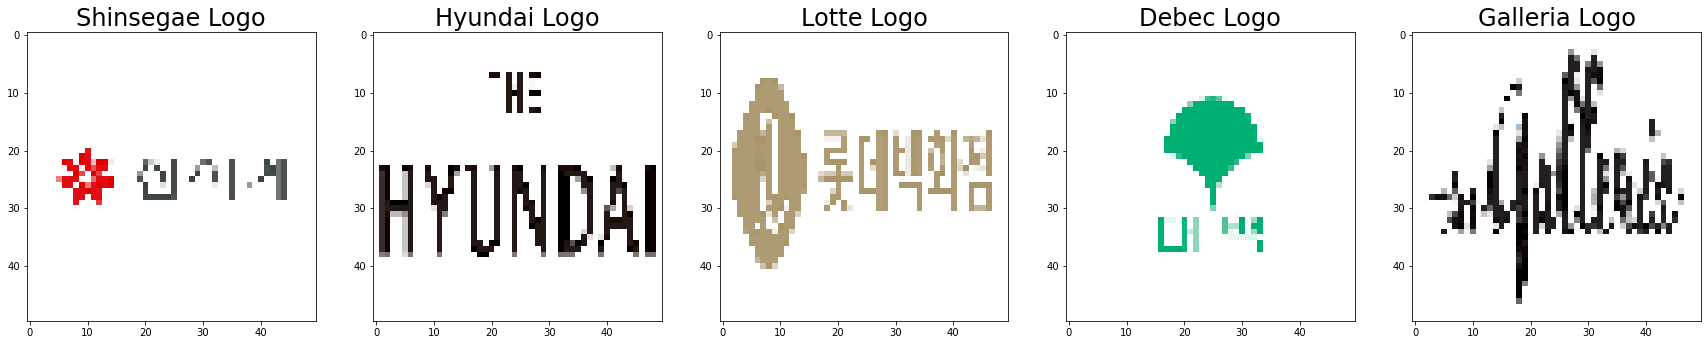

In [127]:
fig=plt.figure(figsize=(30,30))

plt.subplot(1, 5, 1)
plt.imshow(shinimg)
plt.title('Shinsegae Logo', fontsize=24)

plt.subplot(1, 5, 2)
plt.imshow(hyundai)
plt.title('Hyundai Logo', fontsize=24)

plt.subplot(1, 5, 3)
plt.imshow(lotte)
plt.title('Lotte Logo', fontsize=24)

plt.subplot(1, 5, 4)
plt.imshow(debec)
plt.title('Debec Logo', fontsize=24)

plt.subplot(1, 5, 5)
plt.imshow(galleria)
plt.title('Galleria Logo', fontsize=24)
plt.show()

In [128]:
# a = Image.open('./departdatashinsegae/shinsegae'+str(i)+'.png')
# np.array(a).reshape(-1,50*50)[0].tolist()

In [163]:
allshinimg = []
allhyundaiimg = []
alllotteimg = []
alldebecimg = []
allgalleriaimg = []


for i in range(22):
    a = Image.open('./departdatashinsegae/shinsegae'+str(i)+'.png')
    allshinimg.append(np.array(a).reshape(-1,50*50)[0].tolist())
    
for j in range(20):
    b = Image.open('./departdatahyundai/hyundai'+str(j)+'.png')
    allhyundaiimg.append(np.array(b).reshape(-1,50*50)[0].tolist())
    
for o in range(20):
    c = Image.open('./departdatalotte/lotte'+str(o)+'.png')
    alllotteimg.append(np.array(c).reshape(-1,50*50)[0].tolist())
  
for f in range(22):
    d = Image.open('./departdatadebec/debec'+str(f)+'.png')
    alldebecimg.append(np.array(d).reshape(-1,50*50)[0].tolist())
    
for g in range(20):
    e = Image.open('./departdatagalleria/galleria'+str(g)+'.png')
    allgalleriaimg.append(np.array(e).reshape(-1,50*50)[0].tolist())

In [164]:
print('신세계 로고 : ', len(allshinimg))
print('현대 로고 : ', len(allhyundaiimg))
print('롯데 로고 : ', len(alllotteimg))
print('대백 로고 : ', len(alldebecimg))
print('갤러리아 로고 : ', len(allgalleriaimg))

신세계 로고 :  22
현대 로고 :  20
롯데 로고 :  20
대백 로고 :  22
갤러리아 로고 :  20


In [229]:
allimgplus=np.row_stack((allshinimg, allhyundaiimg, alllotteimg, alldebecimg, allgalleriaimg))
allimgplus.shape

(104, 2500)

In [230]:
target1=np.array([0]*22)
target2=np.array([1]*20)
target3=np.array([2]*20)
target4=np.array([3]*22)
target5=np.array([4]*20)

In [231]:
target=np.concatenate([target1, target2, target3, target4, target5])
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [232]:
allimgplus

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [ 41,  37,  25, ..., 254, 131, 254],
       [254, 254, 254, ..., 228,   1, 254]])

In [233]:
# allimgplus=allimgplus/255.0

In [234]:
allimgplus=allimgplus.reshape(-1,50,50,1)

In [235]:
# 훈련/테스트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(allimgplus, target,
                                                    random_state=42,
                                                    stratify=target)

In [236]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

In [237]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  stratify=y_train,
                                                  random_state=42)

In [238]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(58, 50, 50, 1) (58,)
(26, 50, 50, 1) (26,)
(20, 50, 50, 1) (20,)


In [239]:
model=Sequential()
# model.add(Flatten())
# model.add(Dense(50, activation='relu', input_shape=(2500,)))
# model.add(Dense(15, activation='relu'))
# model.add(Dense(5, activation='softmax'))

In [240]:
# 이미지 특징 추출 Layer => 첫번째 입력값 설정
model.add(Conv2D(58, kernel_size=3, activation='relu', padding='same', input_shape=(50,50,1)))
# model.add(Dense(58, kernel_size=3, activation='relu', padding='same', input_shape=(50,50,1)))

In [241]:
# # 이미지 특징 다운샘플링 Layer => MaxPool2D
model.add(MaxPool2D())

In [242]:
model.add(Conv2D(200, kernel_size=3, padding='same'))

In [243]:
# # 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())

In [244]:
# 출력층 => Node : 10개(0~9), activation : softmax
# model.add(Conv2D(1000, kernel_size=3, activation='relu', padding='same'))
model.add(Dense(5, activation='softmax'))

In [245]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 50, 50, 58)        580       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 58)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 200)       104600    
                                                                 
 flatten_5 (Flatten)         (None, 125000)            0         
                                                                 
 dense_5 (Dense)             (None, 5)                 625005    
                                                                 
Total params: 730,185
Trainable params: 730,185
Non-trainable params: 0
________________________________________________

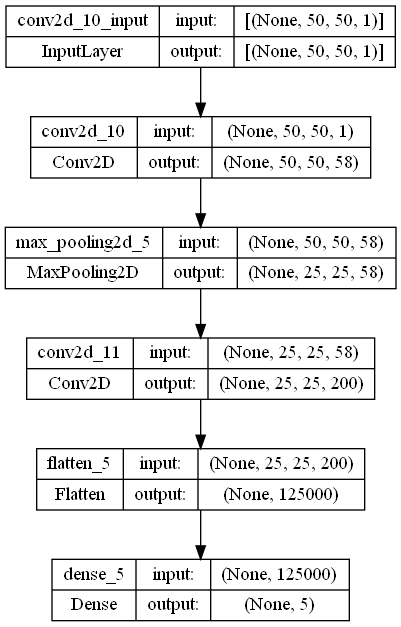

In [246]:
plot_model(model, show_shapes=True)

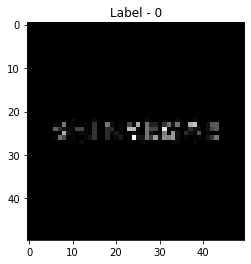

In [247]:
plt.imshow(x_val[3].reshape(50,50), cmap='gray')
plt.title(f'Label - {y_val[3]}')
plt.show()

In [248]:
y_train

array([1, 3, 2, 0, 1, 1, 0, 3, 3, 4, 0, 3, 2, 3, 3, 2, 2, 4, 4, 0, 4, 3,
       0, 3, 1, 1, 0, 2, 4, 0, 4, 3, 0, 0, 3, 0, 4, 2, 2, 4, 2, 4, 1, 1,
       3, 1, 4, 0, 1, 4, 2, 1, 3, 0, 2, 3, 2, 1])

In [249]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [250]:
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
2/2 [==============================] - 3s 811ms/step - loss: 212.8024 - accuracy: 0.1897 - val_loss: 892.2159 - val_accuracy: 0.1923
Epoch 2/30
2/2 [==============================] - 0s 233ms/step - loss: 465.1995 - accuracy: 0.1552 - val_loss: 155.5207 - val_accuracy: 0.2308
Epoch 3/30
2/2 [==============================] - 1s 272ms/step - loss: 106.1144 - accuracy: 0.2586 - val_loss: 291.8311 - val_accuracy: 0.2692
Epoch 4/30
2/2 [==============================] - 1s 279ms/step - loss: 155.6630 - accuracy: 0.3621 - val_loss: 195.6155 - val_accuracy: 0.2692
Epoch 5/30
2/2 [==============================] - 0s 291ms/step - loss: 99.4367 - accuracy: 0.3793 - val_loss: 95.0157 - val_accuracy: 0.0769
Epoch 6/30
2/2 [==============================] - 1s 288ms/step - loss: 102.9905 - accuracy: 0.5172 - val_loss: 107.6559 - val_accuracy: 0.1538
Epoch 7/30
2/2 [==============================] - 1s 318ms/step - loss: 41.4420 - accuracy: 0.5345 - val_loss: 146.3580 - val_accuracy: 0.

In [251]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 118ms/step - loss: 37.4611 - accuracy: 0.3462


[37.461055755615234, 0.3461538553237915]

In [252]:
pre_y=model.predict(x_test[25].reshape(-1, 50, 50, 1))

1/1 [==============================] - 0s 320ms/step


In [253]:
pre_y.round(2)

array([[0.  , 0.03, 0.  , 0.04, 0.92]], dtype=float32)

In [254]:
y_test[25]

2

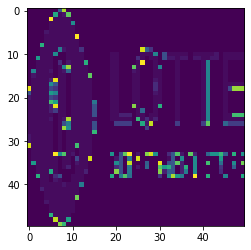

In [257]:
plt.imshow(x_test[25].reshape(50, 50))
plt.show()

## 전체 데이터
---

In [85]:
blwh=solution('blwh')
rgb=solution('rgb')

In [259]:
DIR='./target.csv'
tarDF=pd.read_csv(DIR)

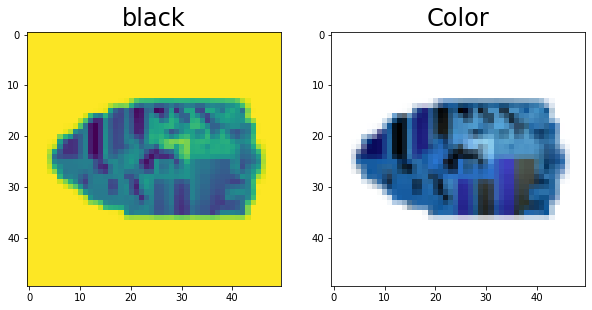

In [90]:
fig=plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(blwh[3500].reshape(50,50,1))
plt.title('black', fontsize=24)

plt.subplot(1, 2, 2)
plt.imshow(rgb[3500].reshape(50,50,3))
plt.title('Color', fontsize=24)
plt.show()

In [260]:
data=rgb
target=tarDF=np.array(tarDF.label)

In [261]:
data.shape, target.shape

((4312, 2500, 3), (4312,))

In [ ]:
# 훈련/테스트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                    random_state=42,
                                                    stratify=target)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  stratify=y_train,
                                                  random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

### [모델]

In [ ]:
model=Sequential()
model.add(Conv2D(58, kernel_size=3, activation='relu', padding='same', input_shape=(50,50,3)))
model.add(MaxPool2D())
model.add(Conv2D(100, kernel_size=3, padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True
)
train_datagen.fit(x_train)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History = model.fit_generator(train_datagen.flow(x_train,y_train, batch_size=32),
                              epochs = 50, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 32)

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
plt.imshow(x_val[100].reshape(50,50,3))
plt.title(f'Label - {y_val[100]}')
plt.show()

In [ ]:
# a=allimgplus[:23]
# b=allimgplus[23:43]
# c=allimgplus[43:63]
# d=allimgplus[63:85]
# e=allimgplus[85:105]